# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr/>

# Setting the path

<hr/>

In [2]:
path = "/Users/kalturaqa/Desktop/TCBDA/Python"

<hr/>

# Reading the CSV file

In [3]:
churn = pd.read_csv(path + "/project_churn_part_1.csv")
churn.head()

,Unnamed: 0,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100,customerid
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,7590-VHVEG
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,5575-GNVDE
2,2,0,0,0,2,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,3668-QPYBK
3,3,0,0,0,45,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,7795-CFOCW
4,4,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9237-HQITU


In [4]:
# Somehow a new column called "Unamed: 0" was added. Let's remove it.
churn = churn.drop("Unnamed: 0", axis=1)
churn

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100,customerid
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,7590-VHVEG
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,5575-GNVDE
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,3668-QPYBK
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,0,0,1,0,0,7795-CFOCW
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,1,6840-RESVB
7039,0,1,1,72,1,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,2234-XADUH
7040,0,1,1,11,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,4801-JZAZL
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8361-LTMKD


<hr/>

# Splitting the data to the train set and the test set

In [5]:
from sklearn.model_selection import train_test_split

test_size = int(len(churn) * 0.2)
train, test = train_test_split(churn, test_size=test_size, random_state=0, shuffle=True)

label = "churn"
customerid = "customerid"

x_train = train.drop(label, axis=1)
x_train = x_train.drop(customerid, axis=1) 
y_train = train[label]
customer_train = train[customerid] 

x_test = test.drop(label, axis=1)
x_test = x_test.drop(customerid, axis=1) 
y_test = test[label]
customer_test = test[customerid] 

In [6]:
train

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100,customerid
3065,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5133-POWUA
2920,0,1,0,72,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,9453-PATOS
2966,1,0,0,14,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8648-PFRMP
6099,0,1,1,71,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,7711-GQBZC
5482,0,1,1,33,1,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,6289-CPNLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,1,0,15,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,4298-OYIFC
3264,0,0,1,10,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,6818-DJXAA
1653,0,1,0,58,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,6625-FLENO
2607,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5539-TMZLF


In [7]:
test

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100,customerid
2200,0,0,0,19,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,6296-DDOOR
4627,0,0,0,60,1,1,1,1,1,1,...,0,0,0,1,0,1,0,0,0,3680-CTHUH
3225,0,0,0,13,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,4931-TRZWN
2828,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8559-WNQZS
3768,0,1,0,55,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,3537-HPKQT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,1,0,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1197-BVMVG
2631,1,1,0,7,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,6861-XWTWQ
5333,0,1,1,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3143-JQEGI
6972,1,0,0,56,1,1,0,1,1,1,...,0,0,1,0,0,1,0,0,0,6664-FPDAC


In [8]:
x_train.shape, y_train.shape, customer_train.shape, x_test.shape, y_test.shape, customer_test.shape

((5635, 38), (5635,), (5635,), (1408, 38), (1408,), (1408,))

In [9]:
x_train

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_1-2,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100
3065,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2920,0,1,0,72,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2966,1,0,0,14,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6099,0,1,1,71,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5482,0,1,1,33,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,1,0,15,1,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
3264,0,0,1,10,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1653,0,1,0,58,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2607,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y_train

3065    0
2920    0
2966    0
6099    0
5482    1
       ..
4931    0
3264    0
1653    0
2607    1
2732    0
Name: churn, Length: 5635, dtype: int64

In [11]:
customer_train

3065    5133-POWUA
2920    9453-PATOS
2966    8648-PFRMP
6099    7711-GQBZC
5482    6289-CPNLD
           ...    
4931    4298-OYIFC
3264    6818-DJXAA
1653    6625-FLENO
2607    5539-TMZLF
2732    9929-PLVPA
Name: customerid, Length: 5635, dtype: object

In [12]:
x_test

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_1-2,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100
2200,0,0,0,19,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4627,0,0,0,60,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
3225,0,0,0,13,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2828,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3768,0,1,0,55,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,1,0,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2631,1,1,0,7,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5333,0,1,1,13,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6972,1,0,0,56,1,1,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0


In [13]:
y_test

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2453    0
2631    1
5333    1
6972    1
4598    0
Name: churn, Length: 1408, dtype: int64

In [14]:
customer_test

2200    6296-DDOOR
4627    3680-CTHUH
3225    4931-TRZWN
2828    8559-WNQZS
3768    3537-HPKQT
           ...    
2453    1197-BVMVG
2631    6861-XWTWQ
5333    3143-JQEGI
6972    6664-FPDAC
4598    4929-ROART
Name: customerid, Length: 1408, dtype: object

<hr/>

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_decision_tree = clf.predict(x_test)

output = pd.DataFrame({'customerid': customer_test, 'actual_churn':y_test, 'predicted_churn': y_test_pred_decision_tree}) 
output.to_csv('my_DecisionTree_Prediction.csv', index=False) 

In [16]:
# DOES NOT WORK IN MACOS

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from IPython.display import SVG
# from graphviz import Source
# from IPython.display import display

# def plot_tree(tree, features, labels):
#     graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
#     display(SVG(graph.pipe(format='svg')))

# plot_tree(clf, x_train.columns, ['Churn', 'Not Churn'])

<hr/>

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)

output = pd.DataFrame({'passengerid': customer_test, 'actual_churn':y_test, 'predicted_churn': y_test_pred_random_forest})
output.to_csv('my_RandomForest_Prediction.csv', index=False)

In [18]:
feature_importances = model.feature_importances_ 
feature_importances

array([5.95088380e-03, 2.00574442e-03, 3.30779321e-03, 1.45967915e-01,
       6.29087109e-04, 1.36507247e-03, 2.49665245e-03, 4.83608863e-03,
       1.21862405e-04, 5.17573788e-03, 2.79836799e-03, 1.18097217e-03,
       1.05849826e-02, 5.73670316e-02, 6.17620704e-02, 5.36079989e-05,
       1.23951544e-05, 9.59067115e-03, 1.22414478e-01, 3.32119605e-02,
       2.15302058e-01, 1.01063654e-02, 5.34042562e-02, 1.02047371e-04,
       1.00999658e-03, 8.83250741e-02, 7.95101076e-04, 1.00872285e-01,
       2.66893211e-03, 3.09246097e-05, 2.16836208e-04, 9.05396948e-04,
       2.30363516e-02, 1.85362479e-02, 7.16262306e-04, 9.34787982e-04,
       1.48240007e-03, 1.07213009e-02])

In [19]:
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) 
stats.sort_values('importance', ascending=False) 

,feature,importance
20,contract_Month-to-month,0.215302
3,tenure,0.145968
18,internetservice_Fiber optic,0.122414
27,tenureYears_0-1,0.100872
25,paymentmethod_Electronic check,0.088325
14,totalcharges,0.061762
13,monthlycharges,0.057367
22,contract_Two year,0.053404
19,internetservice_No,0.033212
32,tenureYears_5+,0.023036


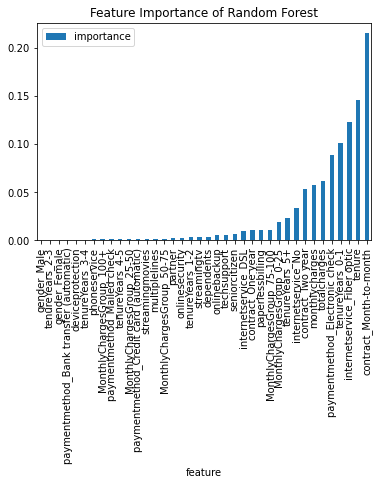

In [20]:
stats_sort = stats.sort_values('importance', ascending=True)
stats_sort.plot(y='importance', x='feature', kind='bar')
plt.title('Feature Importance of Random Forest');

<hr/>

# K nearest neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)

output = pd.DataFrame({'passengerid': customer_test, 'actual_churn':y_test, 'predicted_churn': y_test_pred_knn})
output.to_csv('my_Knn_Prediction.csv', index=False)

<hr/>

# Accuracy - comparison between the 3 algorithms

In [22]:
from sklearn.metrics import accuracy_score 

In [23]:
test_acc = accuracy_score(y_test, y_test_pred_decision_tree)
test_acc

0.7784090909090909

In [24]:
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7748579545454546

In [25]:
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7428977272727273

<hr/>

# Overfitting - Decision tree

In [26]:
# Decision Tree -- max_depth = 3

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_decision_tree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_decision_tree)
test_acc

0.7784090909090909

In [27]:
# Decision Tree -- max_depth = 5 - seems to be the best value for tree depth

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_decision_tree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_decision_tree)
test_acc

0.7848011363636364

In [28]:
# Decision Tree -- max_depth = 7 

clf = DecisionTreeClassifier(max_depth=7)
clf.fit(x_train, y_train)
y_test_pred_decision_tree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_decision_tree)
test_acc

0.7705965909090909

In [29]:
# Decision Tree -- max_depth = 9 

clf = DecisionTreeClassifier(max_depth=9)
clf.fit(x_train, y_train)
y_test_pred_decision_tree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_decision_tree)
test_acc

0.7393465909090909

<hr/>

# Overfitting - Random forest - n_estimators

In [30]:
# Random Forest -- n_estimators = 100 & max_depth = 5 

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7883522727272727

In [31]:
# Random Forest -- n_estimators = 200 & max_depth = 5 

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7876420454545454

In [32]:
# Random Forest -- n_estimators = 150 & max_depth = 5 

model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7883522727272727

In [33]:
# Random Forest -- n_estimators = 50 & max_depth = 5 

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7883522727272727

In [34]:
# Random Forest -- n_estimators = 10 & max_depth = 5 - looks like the best value for n_estimators

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_random_forest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_random_forest)
test_acc

0.7954545454545454

<hr/>

# Overfitting - Random forest - max_depth

In [35]:
# Random Forest -- n_estimators = 10 & max_depth = 7 - looks like the best value for max_depth

model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7961647727272727

In [36]:
# Random Forest -- n_estimators = 10 & max_depth = 9

model = RandomForestClassifier(n_estimators=10, max_depth=9, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7890625

In [37]:
# Random Forest -- n_estimators = 10 & max_depth = 11

model = RandomForestClassifier(n_estimators=10, max_depth=11, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7840909090909091

# The best values are: n_estimators=10 & max_depth = 11 

<hr/>

# Overfitting - K nearest neighbors

In [38]:
# Knn -- n_neighbors = 3

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7428977272727273

In [39]:
# Knn -- n_neighbors = 5 

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7578125

In [40]:
# Knn -- n_neighbors = 7

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7571022727272727

In [41]:
# Knn -- n_neighbors = 9 - seems to be the best value

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7698863636363636

In [42]:
# Knn -- n_neighbors = 11

clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train, y_train)
y_test_pred_knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_knn)
test_acc

0.7634943181818182

<hr/>

# Scale

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train_scaled, y_train)

y_test_pred_knn_scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': customer_test, 'actual_churn':y_test, 'predicted_churn': y_test_pred_knn, 
                       'predicted_churn_after_scaling':y_test_pred_knn_scaled}) 
output.to_csv('my_Knn_Prediction_scaled.csv', index=False)


test_acc = accuracy_score(y_test, y_test_pred_knn_scaled)
test_acc

0.7720170454545454

<hr/>

# Setting a benchmark

In [44]:
# The most common value for the label is "0" - not churned
y_train.value_counts()

0    4134
1    1501
Name: churn, dtype: int64

In [45]:
def get_benchmark_predictions(x, benchmark_value):
    return np.ones(len(x))*benchmark_value
    
benchmark_value = 0
y_test_pred_benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_benchmark

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# All 3 algorithms were better than the benchmark
test_acc = accuracy_score(y_test, y_test_pred_benchmark)
test_acc

0.7386363636363636